In [1]:
!unzip -qq dataset.zip

In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("./dataset/train/")
new_base_dir = pathlib.Path("./cats_vs_dogs_1000")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [5]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [7]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [8]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [9]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [10]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [11]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 18s 75ms/step - loss: 0.6956 - accuracy: 0.5115 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6931 - accuracy: 0.5235 - val_loss: 0.6923 - val_accuracy: 0.5880
Epoch 3/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6900 - accuracy: 0.5605 - val_loss: 0.6854 - val_accuracy: 0.6320
Epoch 4/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6798 - accuracy: 0.5995 - val_loss: 0.6542 - val_accuracy: 0.6310
Epoch 5/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6536 - accuracy: 0.6355 - val_loss: 0.6290 - val_accuracy: 0.6440
Epoch 6/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6208 - accuracy: 0.6670 - val_loss: 0.6420 - val_accuracy: 0.6240
Epoch 7/30
63/63 [==============================] - 4s 61ms/step - loss: 0.5953 - accuracy: 0.6835 - val_loss: 0.6360 - val_accuracy: 0.6520
Epoch 8/30
6

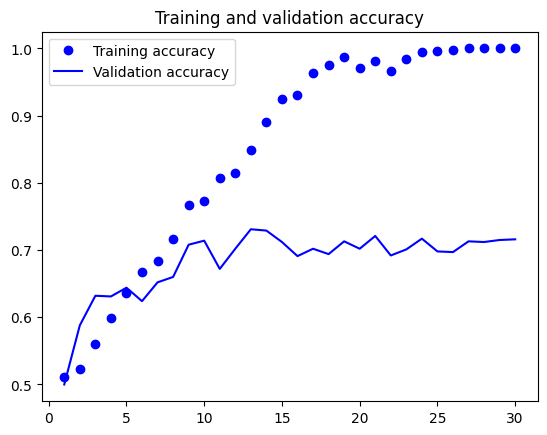

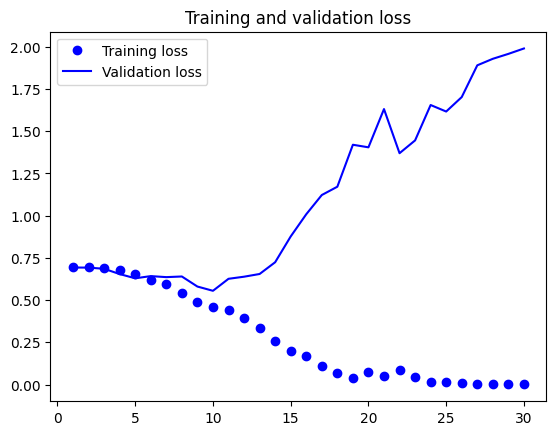

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 37ms/step - loss: 0.5332 - accuracy: 0.7720
Test accuracy: 0.772


In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

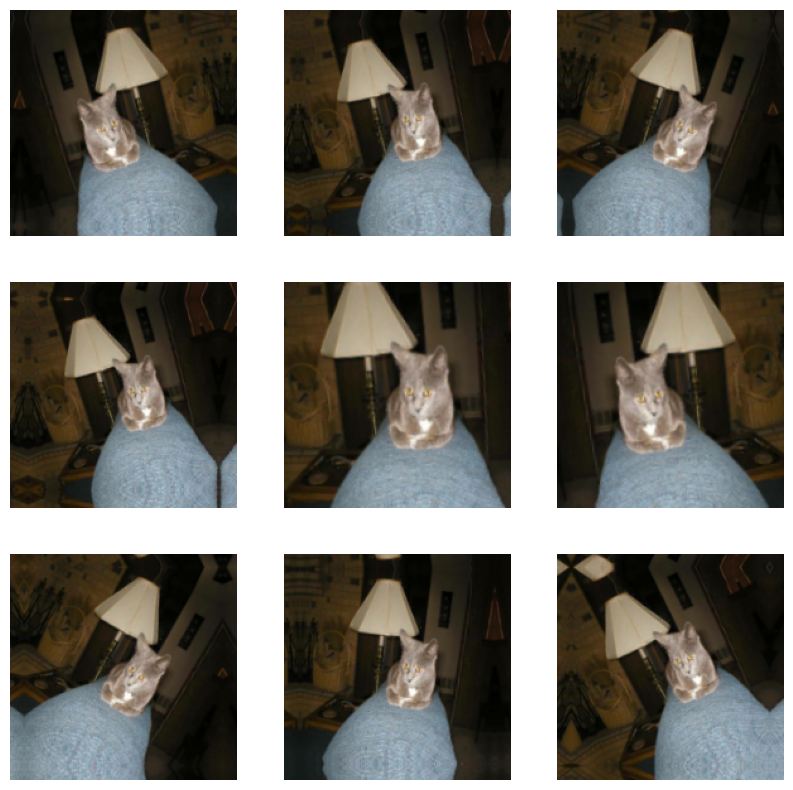

In [15]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [16]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 80ms/step - loss: 0.6935 - accuracy: 0.4995 - val_loss: 0.6929 - val_accuracy: 0.5170
Epoch 2/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6957 - accuracy: 0.5260 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6935 - accuracy: 0.5110 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 5s 77ms/step - loss: 0.6910 - accuracy: 0.5340 - val_loss: 0.6950 - val_accuracy: 0.5110
Epoch 5/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6861 - accuracy: 0.5675 - val_loss: 0.6733 - val_accuracy: 0.5760
Epoch 6/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6662 - accuracy: 0.6070 - val_loss: 0.6631 - val_accuracy: 0.6020
Epoch 7/100
63/63 [==============================] - 5s 68ms/step - loss: 0.6562 - accuracy: 0.6220 - val_loss: 0.6745 - val_accuracy: 0.5530
Epoch 

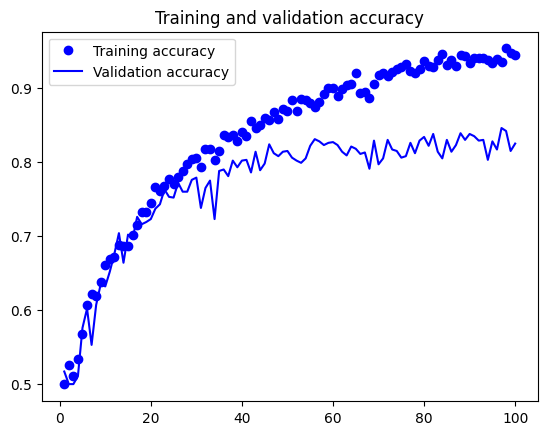

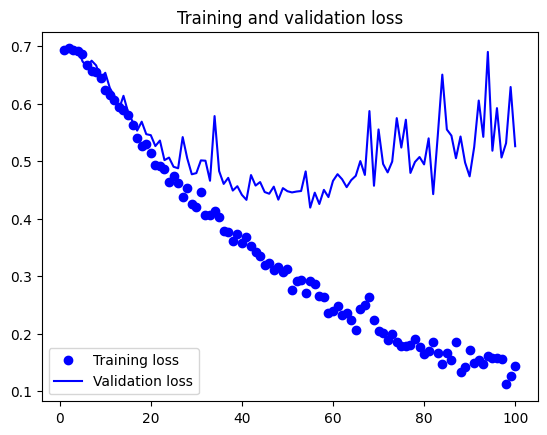

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [22]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 49ms/step - loss: 0.4537 - accuracy: 0.8130
Test accuracy: 0.813


In [30]:
conv_base = keras.applications.resnet50.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [32]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.resnet50.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 23ms/step


In [33]:
train_features.shape

(2000, 6, 6, 2048)

In [36]:
inputs = keras.Input(shape=(6, 6, 2048))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 34ms/step - loss: 6.4044 - accuracy: 0.9415 - val_loss: 3.2573 - val_accuracy: 0.9770
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2009 - accuracy: 0.9855 - val_loss: 3.8352 - val_accuracy: 0.9730
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8828 - accuracy: 0.9940 - val_loss: 12.0799 - val_accuracy: 0.9510
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8613 - accuracy: 0.9915 - val_loss: 5.5061 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 0.8207 - accuracy: 0.9930 - val_loss: 7.0351 - val_accuracy: 0.9680
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 0.1287 - accuracy: 0.9975 - val_loss: 5.3366 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 1s 13ms/step - loss: 0.4341 - accuracy: 0.9960 - val_loss: 8.5055 - val_accuracy: 0.9670
Epoch 8/20
6

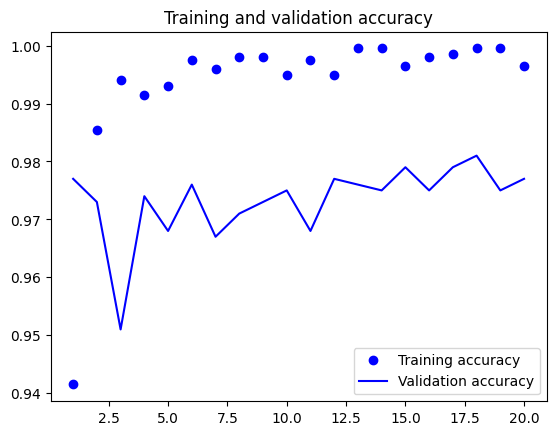

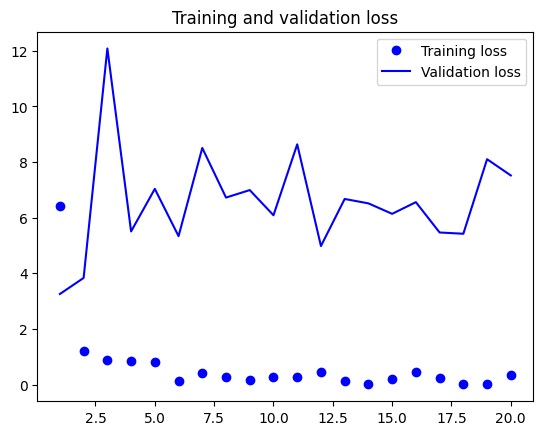

In [37]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [38]:
conv_base  = keras.applications.resnet50.ResNet50(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [39]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 212


In [40]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [41]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [42]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 14s 159ms/step - loss: 9.2920 - accuracy: 0.9200 - val_loss: 2.9454 - val_accuracy: 0.9790
Epoch 2/50
63/63 [==============================] - 8s 121ms/step - loss: 3.4073 - accuracy: 0.9725 - val_loss: 4.0655 - val_accuracy: 0.9660
Epoch 3/50
63/63 [==============================] - 8s 115ms/step - loss: 3.8375 - accuracy: 0.9690 - val_loss: 3.1107 - val_accuracy: 0.9730
Epoch 4/50
63/63 [==============================] - 9s 139ms/step - loss: 2.7090 - accuracy: 0.9725 - val_loss: 2.5909 - val_accuracy: 0.9830
Epoch 5/50
63/63 [==============================] - 8s 121ms/step - loss: 2.2924 - accuracy: 0.9730 - val_loss: 3.4580 - val_accuracy: 0.9750
Epoch 6/50
63/63 [==============================] - 8s 116ms/step - loss: 2.2150 - accuracy: 0.9780 - val_loss: 5.9522 - val_accuracy: 0.9730
Epoch 7/50
63/63 [==============================] - 8s 119ms/step - loss: 1.8446 - accuracy: 0.9790 - val_loss: 3.8486 - val_accuracy: 0.9800
Epoch

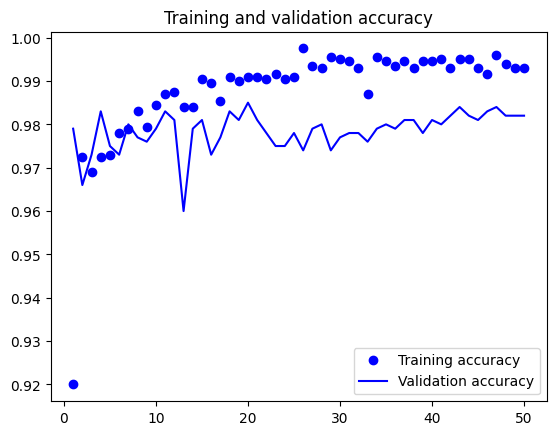

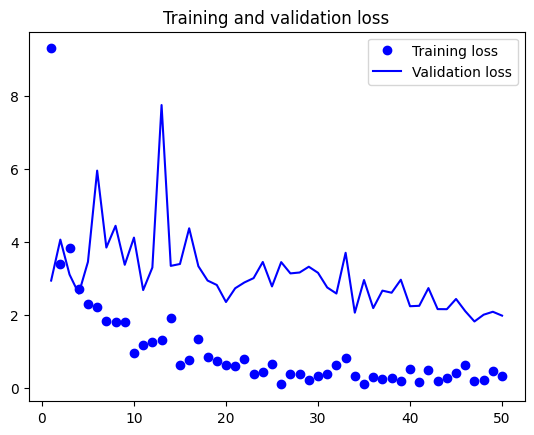

In [43]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [44]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 68ms/step - loss: 2.6182 - accuracy: 0.9780
Test accuracy: 0.978


In [45]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_8[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [46]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [52]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


63/63 [==============================] - 15s 156ms/step - loss: 1.7197 - accuracy: 0.9770 - val_loss: 7.1548 - val_accuracy: 0.9580
Epoch 2/30
63/63 [==============================] - 9s 144ms/step - loss: 1.3439 - accuracy: 0.9760 - val_loss: 3.0866 - val_accuracy: 0.9750
Epoch 3/30
63/63 [==============================] - 9s 146ms/step - loss: 0.6850 - accuracy: 0.9810 - val_loss: 2.4232 - val_accuracy: 0.9710
Epoch 4/30
63/63 [==============================] - 9s 140ms/step - loss: 0.7774 - accuracy: 0.9870 - val_loss: 1.9871 - val_accuracy: 0.9750
Epoch 5/30
63/63 [==============================] - 8s 119ms/step - loss: 0.4569 - accuracy: 0.9880 - val_loss: 2.4601 - val_accuracy: 0.9690
Epoch 6/30
63/63 [==============================] - 9s 142ms/step - loss: 0.3532 - accuracy: 0.9905 - val_loss: 1.3190 - val_accuracy: 0.9830
Epoch 7/30
63/63 [==============================] - 8s 123ms/step - loss: 0.3875 - accuracy: 0.9885 - val_loss: 1.3800 - val_accuracy: 0.9790
Epoch 8/30
63/63

In [53]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 69ms/step - loss: 1.3284 - accuracy: 0.9780
Test accuracy: 0.978
